In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Premier League - Statistics

In [2]:
#My dataset 
df_pl = pd.read_csv('/work/EPL_standings_2000-2022.csv', header=0, sep=',')
df_pl.rename(columns={'Pos': 'Position', 'Pld': 'Matchs', 'W': 'Wins', 'D': 'Draws', 
'L': 'Losses', 'GF': 'Goals Scored', 'GA': 'Goals Conceded', 'GD': 'Goals difference'}, inplace=True)
df_pl.head()

,Season,Position,Team,Matchs,Wins,Draws,Losses,Goals Scored,Goals Conceded,Goals difference,Pts,Qualification or relegation
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Qualification for the Champions League first g...
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,Qualification for the Champions League first g...
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,Qualification for the Champions League third q...
3,2000-01,4,Leeds United,38,20,8,10,64,43,21,68,Qualification for the UEFA Cup first round[a]
4,2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66,Qualification for the UEFA Cup first round[a]


## General Summarize

### Red devils's  decade - (2000-2010)

In [3]:
#Seasons od dataset
years = np.array(list(range(2000, 2022)), dtype=str)
numbers= np.array(list(range(1, 23)), dtype=str)
season = []
for year, num in zip(years, numbers):
    if int(num) < 10:
        season.append(year+'-'+'0'+num)
    else:
        season.append(year+'-'+num)
season

['2000-01',
 '2001-02',
 '2002-03',
 '2003-04',
 '2004-05',
 '2005-06',
 '2006-07',
 '2007-08',
 '2008-09',
 '2009-10',
 '2010-11',
 '2011-12',
 '2012-13',
 '2013-14',
 '2014-15',
 '2015-16',
 '2016-17',
 '2017-18',
 '2018-19',
 '2019-20',
 '2020-21',
 '2021-22']

In [4]:
#Build dataset about statistics of PL in the first decade of XXI century.
df_decade1 = df_pl.copy()
df_years = pd.DataFrame({
    'Season': season,
    'Year': np.arange(2000, 2022),
})
df_decade1 = pd.merge(left=df_decade1, right=df_years, on='Season', how='outer')
df_decade1 = df_decade1[df_decade1.Year <=2010]
df_decade1.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])

In [5]:
#How many matchs there were during this decade?
matches = df_decade1.loc[df_decade1.Team == 'Manchester United', 'Matchs']
matches = matches.sum()
matches

418

In [6]:
#Champions teams
df_champions = df_decade1.loc[df_decade1.Position == 1, ['Team', 'Year']]
df_champions.sort_values('Team', ascending=False, inplace=True)
#Top5: The most winning teams
df_wins = df_decade1.copy()
df_wins = df_wins.groupby('Team').agg({'Wins': 'sum'}).sort_values('Wins', ascending=False).head()
#Stats of Manchester United
stats_mun = df_decade1[df_decade1.Team == 'Manchester United']
stats_mun = stats_mun.pivot_table(index='Team', aggfunc={'Wins': 'sum', 'Draws': 'sum', 'Losses': 'sum'}).T
#Possible points
points_mun = df_decade1.loc[df_decade1.Team == 'Manchester United', ['Team', 'Pts']]
points_mun = points_mun.groupby('Team').agg({'Pts': 'sum'})
points_mun['Points Loss'] = matches*3 - points_mun.iloc[0, 0]
points_mun.rename(columns={'Pts': 'Points earned'}, inplace=True)
points_mun = points_mun.T

In [7]:
#Shorten the names.
df_wins.rename(index={'Manchester United': 'Man. United', 'Tottenham Hotspur': 'Tottenham'}, inplace=True)
df_wins.index[[0, -1]]

Index(['Man. United', 'Tottenham'], dtype='object', name='Team')

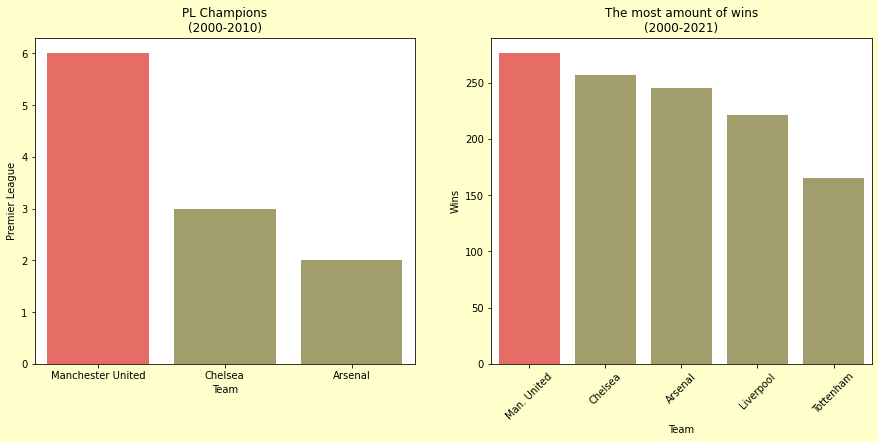

In [8]:
#Colors
palette = {team: '#AAA662' for team in df_wins.index}
palette['Man. United'] = '#FC5A50'
#Canvas
fig = plt.figure(figsize=(15, 6))
#Countplot
ax1 = fig.add_subplot(1, 2, 1)
sns.countplot(data=df_champions, x='Team', palette=palette.values())
ax1.set(ylabel='Premier League', title='PL Champions\n(2000-2010)')
#Barplot
ax2 = fig.add_subplot(1, 2, 2)
sns.barplot(data=df_wins, x=df_wins.index, y='Wins', palette=palette.values())
ax2.set(ylabel='Wins', title='The most amount of wins\n(2000-2021)')
ax2.set_xticks(np.arange(5), df_wins.index,rotation=45)
fig.set_facecolor('#FFFFCB')
fig.show()

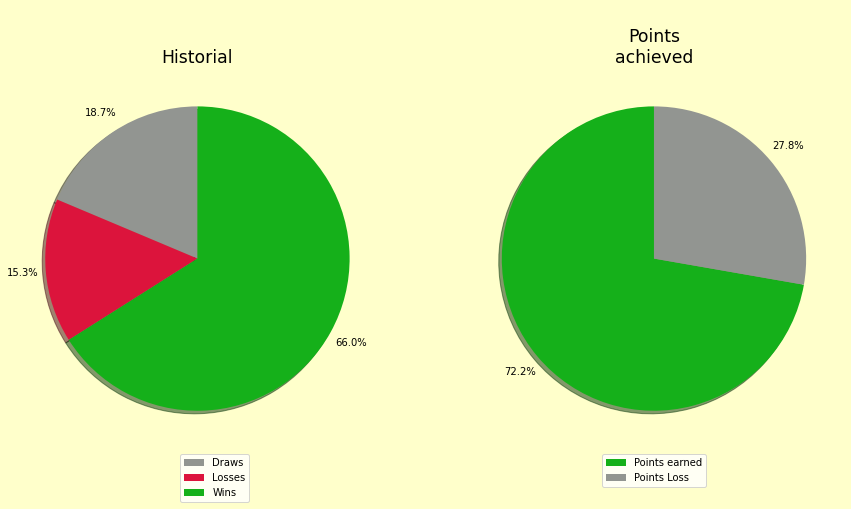

In [9]:
#Canvas
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
#Axes
#Pie chart
ax1.pie(data=stats_mun, x='Manchester United', autopct="%.1f%%", 
colors=['#929591', '#DC143C', '#15B01A'], pctdistance=1.15, shadow=True, startangle=90)
ax1.set_title('\nHistorial', fontdict={'fontsize': 'xx-large'})
ax1.legend(labels=stats_mun.index, bbox_to_anchor=(0.65, 0))
#Pie chart
ax2.pie(data=points_mun, x='Manchester United', autopct="%.1f%%", pctdistance=1.15, shadow=True,
startangle=90, colors=['#15B01A', '#929591'])
ax2.set_title('\nPoints\nachieved', fontdict={'fontsize': 'xx-large'})
ax2.legend(labels=points_mun.index, bbox_to_anchor=(0.65, 0))
fig.set_facecolor('#FFFFCB')
fig.show()

Manchester United was the best team of British football during these 10 years and they leave us with the following statistics:
* 6 Premier Leagues.
* More than 50% of matches they played ended in victory -> 276 wins in 418 matches.
* They've earned more than 70% of possible points  -> 906 / 1254 points.


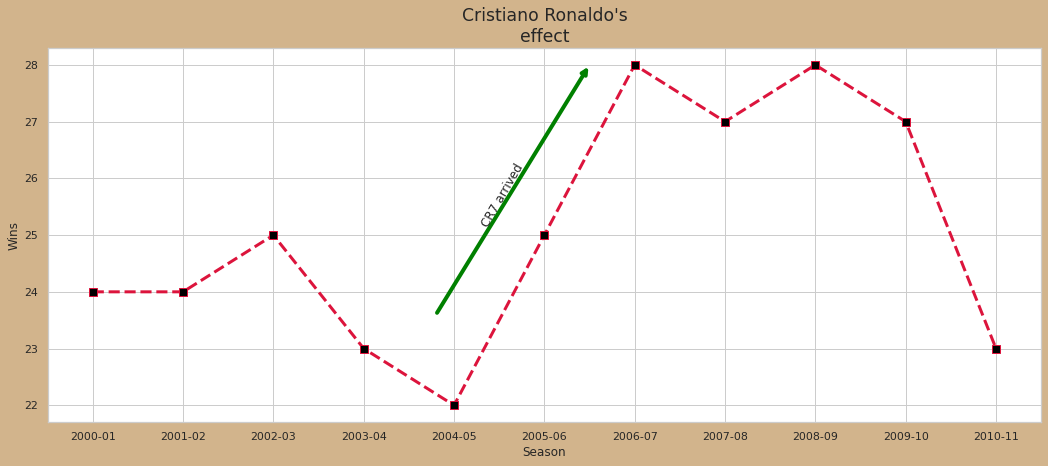

In [10]:
#The best years of United
df_mun = df_decade1
df_mun = df_mun.loc[df_mun.Team == 'Manchester United', ['Season', 'Wins']]

#Canvas
sns.set_theme(style='whitegrid')
fig = plt.figure()
#Axes
ax = fig.add_axes([0, 0, 2.3, 1.3])
#Line plot
ax.plot(df_mun.Season, df_mun.Wins, marker='s', linestyle='--', color='#DC143C', linewidth=3,
markersize=8, markerfacecolor='#000000')
ax.set(xlabel='Season', ylabel='Wins')
ax.set_title("Cristiano Ronaldo's\neffect", fontdict={'fontsize': 'x-large'})

#Arrow
plt.annotate(
    text='', xy=(5.5, 28),
    xytext=(3.8, 23.6), xycoords='data',
    arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='#008000', lw=4)
)
#Text
plt.annotate(
    text='CR7 arrived', xy=(4.8, 25.7),
    rotation=60, va='center', ha='right'
)


fig.set_facecolor('#D2B48C')
fig.show()

In [11]:
#Years where Manchester United was champion.
team, position = df_decade1.Team == 'Manchester United', df_decade1.Position == 1
years = df_decade1.loc[team & position, ['Season', 'Team', 'Position']]
years.set_index('Season', inplace=True)
years

,Team,Position
Season,,
2000-01,Manchester United,1
2002-03,Manchester United,1
2006-07,Manchester United,1
2007-08,Manchester United,1
2008-09,Manchester United,1
2010-11,Manchester United,1


The arrival of Cristiano Ronaldo to Manchester United was a determining factor in the success  they achieved during these years. Well, this is where he developed his football skills to become the best player of the world in 2008. Likewise, he achieved to win the Premier league 3 times in a row in the years 2006, 2007 and 2008. And also during these 3 years Manchester United reached their highest winning numbers, thus demonstrating the superiority they had in British football.

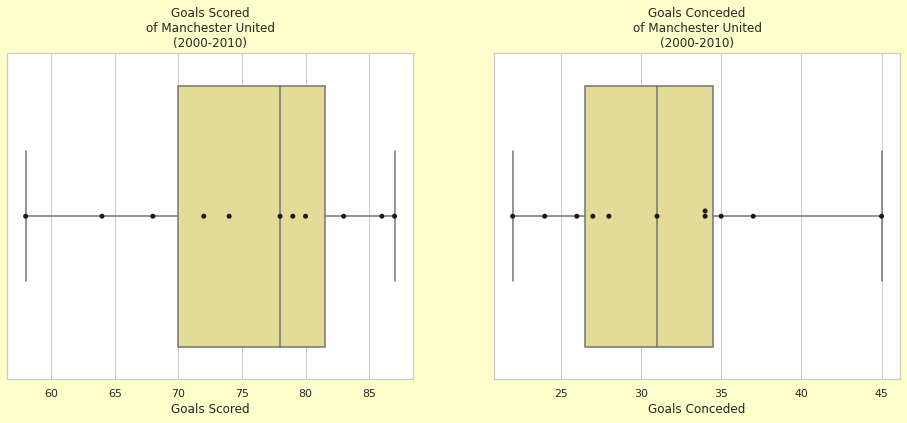

In [12]:
#Analizar los goles que anotan y los que reciben a tráves de un boxplot
df_goals = df_decade1.loc[df_decade1.Team == 'Manchester United', ['Goals Scored', 'Goals Conceded']]
#Canvas
fig = plt.figure(figsize=(16, 6))
#Boxplot: Goals Scored
ax1 = fig.add_subplot(1, 2, 1)
ax1 = sns.boxplot(data=df_goals, x='Goals Scored', color='#F0E68C')
ax1 = sns.swarmplot(data=df_goals, x='Goals Scored', color='k')
ax1.set_title('Goals Scored\nof Manchester United\n(2000-2010)')
#Boxplot: Goals Conceded
ax2 = fig.add_subplot(1, 2, 2)
ax2 = sns.boxplot(data=df_goals, x='Goals Conceded', color='#F0E68C')
ax2 = sns.swarmplot(data=df_goals, x='Goals Conceded', color='k')
ax2.set_title('Goals Conceded\nof Manchester United\n(2000-2010)')
fig.set_facecolor('#FFFFCB')
fig.show()

In [13]:
statistics = df_goals.describe()
statistics = statistics.loc[['mean', 'min', '25%', '50%', '75%', 'max'], :]
statistics.loc['mean'] = statistics.loc['mean'].apply(lambda x: np.round(x, 2))
statistics

,Goals Scored,Goals Conceded
mean,75.36,31.18
min,58.00,22.00
25%,70.00,26.50
50%,78.00,31.00
75%,81.50,34.50
max,87.00,45.00


During these years Manchester United proved to be very scorer team and strong in defense. Therefore, they leave us the following statistics:
* Average goals per season: 75.36 goals. And as for each season there are 38 matches this means that they scored 1.98 goals/match, that is almost 2 goals. On the other hand, if we analyse its best scoring season and the worst you can observe that at least there was 1 goal/match, so it must have been a very safe bet at the time.

* Average goals conceded per season: 31.18 goals. This indicates us that Manchester United received 0.82 goals/match and this data shows the great defensive solidity they had. And as a bonus, during 2007 they only received 22 goals/match, i.e. 0.58 goals/match, thus demonstrating how unlikely it was to score 1 goal to the Red Devils. 



---

#### **Other statistics**

**Goals per Season**

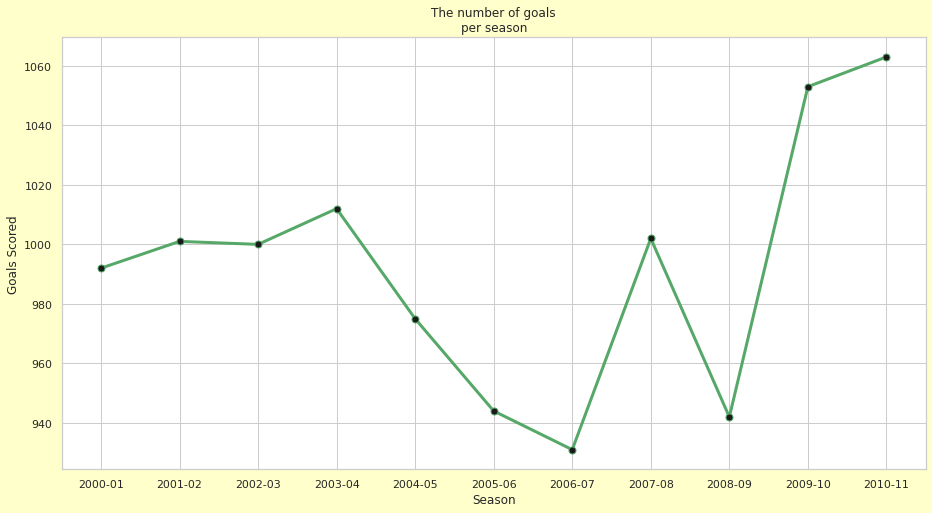

In [14]:
#The most scorer season
df_season = df_decade1.groupby('Season').agg({'Goals Scored': 'sum'})
#Canvas
fig = plt.figure()
#Axes
ax = fig.add_axes([0, 0, 2, 1.5])
#Line plot
ax.plot(df_season.index, df_season['Goals Scored'], marker='o', linestyle='-', color='g',
linewidth=3, markerfacecolor='k', markersize=7)
ax.set(xlabel='Season', ylabel='Goals Scored', title='The number of goals\nper season')
fig.set_facecolor('#FFFFCB')
fig.show()

In [15]:
statistics = df_season.describe().loc[['min', 'max']]
statistics

,Goals Scored
min,931.0
max,1063.0


*In the Premier League 38 dates are played in which each of them plays 10 games.
* The season where the most numer of goals was in 2010 with 1063. That means that the average goal per match was 2.72.

* On the another hand, in which there were fewer goals was in 2006, because only 931 goals were scored. Leaving us an average of goals per match of 2.45 

---

**Seasons that were defined until the last date**

In [16]:
my_palette = {x: 'r' for x in df_decade1.Year.unique()}
s_2000, s_2001 = sns.color_palette('Paired')[-1], sns.color_palette('bone')[2]
s_2002, s_2003 = sns.color_palette('Paired')[-3], sns.color_palette('Paired')[-5]
s_2004, s_2005 = sns.color_palette('Paired')[-6], sns.color_palette('Paired')[-7]
s_2006, s_2007 = sns.color_palette('Paired')[-9], sns.color_palette('Paired')[-10]
s_2008, s_2009 = sns.color_palette('Paired')[1], sns.color_palette('Paired')[-4]
s_2010 = sns.color_palette('bone')[0]
my_palette['2000-01'], my_palette['2001-02'], my_palette['2002-03'], my_palette['2003-04'] = s_2000, s_2001, s_2002, s_2003
my_palette['2004-05'], my_palette['2005-06'], my_palette['2006-07'], my_palette['2007-08'] = s_2004, s_2005, s_2006, s_2007
my_palette['2008-09'], my_palette['2009-10'], my_palette['2010-11'] = s_2008, s_2009, s_2010

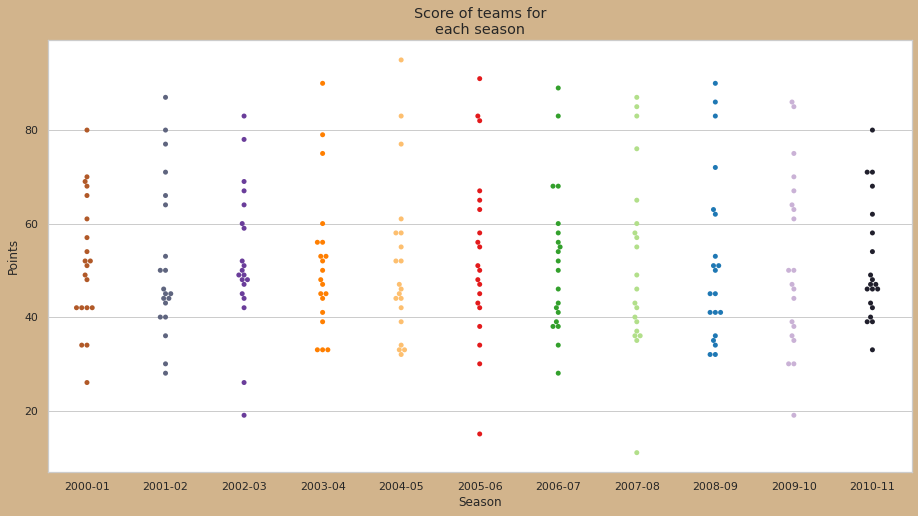

In [17]:
#The most competitve season
df_decade1.head()

#Canvas
fig = plt.figure()
sns.set_theme(style='whitegrid')
#Axes
ax = fig.add_axes([0, 0, 2, 1.5])
#Strip plot
ax = sns.swarmplot(data=df_decade1, x='Season', y='Pts', palette=my_palette)
ax.set_ylabel('Points')
ax.set_title('Score of teams for\neach season', fontdict={'size': 'large'})
fig.set_facecolor('#D2B48C')
fig.show()

In [18]:
#The most competitive seasons
#2007/08
df_2007 = df_decade1.loc[df_decade1.Season == '2007-08', ['Season', 'Position', 'Team', 'Goals difference','Pts']]
df_2007 = df_2007[df_2007.Position <= 3]
df_2007.set_index('Season', inplace=True)
df_2007

,Position,Team,Goals difference,Pts
Season,,,,
2007-08,1,Manchester United,58,87
2007-08,2,Chelsea,39,85
2007-08,3,Arsenal,43,83


The 2007/08 season was very close between Macnhester United and Chelsea. Both teams arrived with the same number of points to the last date, 84 points exactly, being thus a final of infarction. But,the one who ended up raising the cup was the Red Devils. 
These were the results that were given in the day 38:
* Wigan Atlhetic vs Manchester United -> 0:2
* Chelsea vs Boston Wanderers -> 1:1 

In [19]:
#2009/10
df_2009 = df_decade1.loc[df_decade1.Season == '2009-10', ['Season', 'Position', 'Team', 'Goals difference','Pts']]
df_2009 = df_2009[df_2009.Position <= 2]
df_2009.set_index('Season', inplace=True)
df_2009

,Position,Team,Goals difference,Pts
Season,,,,
2009-10,1,Chelsea,71,86
2009-10,2,Manchester United,58,85


And during the 2009/10 season, Chelsea and Manchester United were again the protagonists of the dispute for the title until the last date. And this originated in the date 35, since the Blues lost 2-1 to Totenham and the Red Devils won 1-0 against Manchester City and thus managed to shorten the point difference they had with the first place. This difference of points remained until the last, but Chelsea after that defeat managed to obtain 3 consecutive victories that allowed them to raise the long-awaited Premier League.

---

---

### Citizens decade - (2011 - 2021)

In [20]:
df_decade2 = df_pl.copy()
df_decade2 = pd.merge(left=df_decade2,right=df_years, on='Season', how='outer')
df_decade2 = df_decade2[(2010 < df_decade2.Year) & (df_decade2.Year <= 2021)]
df_decade2.head()

,Season,Position,Team,Matchs,Wins,Draws,Losses,Goals Scored,Goals Conceded,Goals difference,Pts,Qualification or relegation,Year
220,2011-12,1,Manchester City,38,28,5,5,93,29,64,89,Qualification for the Champions League group s...,2011
221,2011-12,2,Manchester United,38,28,5,5,89,33,56,89,Qualification for the Champions League group s...,2011
222,2011-12,3,Arsenal,38,21,7,10,74,49,25,70,Qualification for the Champions League group s...,2011
223,2011-12,4,Tottenham Hotspur,38,20,9,9,66,41,25,69,Qualification for the Europa League group stag...,2011
224,2011-12,5,Newcastle United,38,19,8,11,56,51,5,65,Qualification for the Europa League play-off r...,2011


In [21]:
#Premier League's champions during this decade
df_champions = df_decade2[df_decade2.Position == 1]

#### **THE MOST WINNERS 🏆**

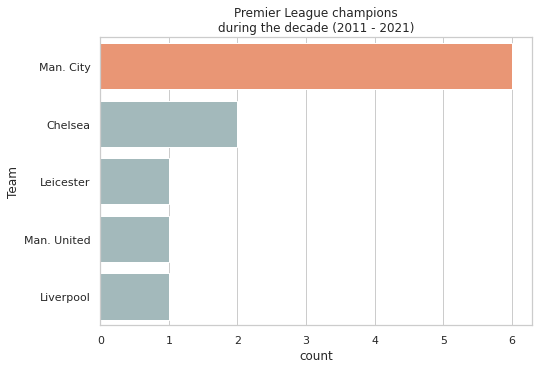

In [22]:
#Palette
c_1 = sns.color_palette('bone')[-2]
c_2 = sns.color_palette('Set2')[1]
my_pltt = {x: c_1 for x in df_champions.Team.unique()}
my_pltt['Manchester City'] = c_2
#Premier League's champions during this decade
df_champions = df_decade2[df_decade2.Position == 1]
#Canvas
fig = plt.figure()
#Axes
ax = fig.add_axes([0, 0, 1, 1])
#Countplot
team_order = ['Manchester City', 'Chelsea', 'Leicester City', 'Manchester United', 'Liverpool']
ax = sns.countplot(data=df_champions, y='Team', order=team_order, palette=my_pltt)
ax.set_yticks(np.arange(5), ['Man. City', 'Chelsea', 'Leicester', 'Man. United', 'Liverpool'])
ax.set_title('Premier League champions\nduring the decade (2011 - 2021)')
fig.show()

Manchester City was the most Premier Leagues team conquered during this second decade of the XXI century. And what's interesting is that they got the same number of leagues than Manchester United in the last decade.

---

#### **THE FALL OF RED DEVILS 👿 📉**

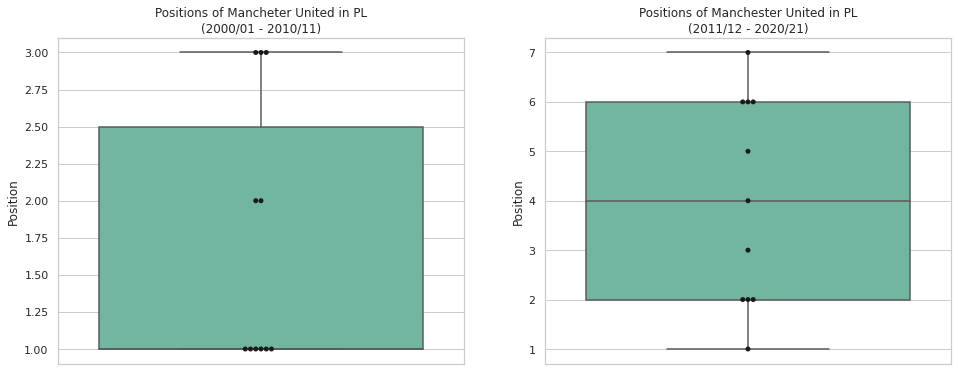

In [23]:
#The fall of Red Devils
df_mun_1 = df_decade1[df_decade1.Team == 'Manchester United']
df_mun_2 = df_decade2[df_decade2.Team == 'Manchester United']
#Canvas
fig = plt.figure(figsize = (16, 6))
#Graphics
#Decade 1
ax1 = fig.add_subplot(121)
ax1 = sns.boxplot(data=df_mun_1, y='Position', palette='Set2')
ax1 = sns.swarmplot(data=df_mun_1, y='Position', color='k')
ax1.set_title('Positions of Mancheter United in PL\n(2000/01 - 2010/11)')
#Decade 2
ax2 = fig.add_subplot(122)
ax2 = sns.boxplot(data=df_mun_2, y='Position', palette='Set2')
ax2 = sns.swarmplot(data=df_mun_2, y='Position', color='k')
ax2.set_title('Positions of Manchester United in PL\n(2011/12 - 2020/21)')
fig.show()

Unfortunately, Manchester United didn't have the same luck as in the last 10 years. And this can be evidenced by the graphics, where one can  see that the worst position treached during the years 2000 and 2010 was the third place; instead, during the second decade they came to be behind the 4th place in 4 occasions, i.e. they weren't in 4 editions of Champions League, the most important tournament in Europe. In addition, they could only win 1 Premier League in the 2012/13 season. 

---

#### **Manchester United (2000/01 - 2010/11) 🆚 Manchester City (2011/12 - 2020/21)**

**STATS: WINS/DRAWS/DEFEATS 📊**

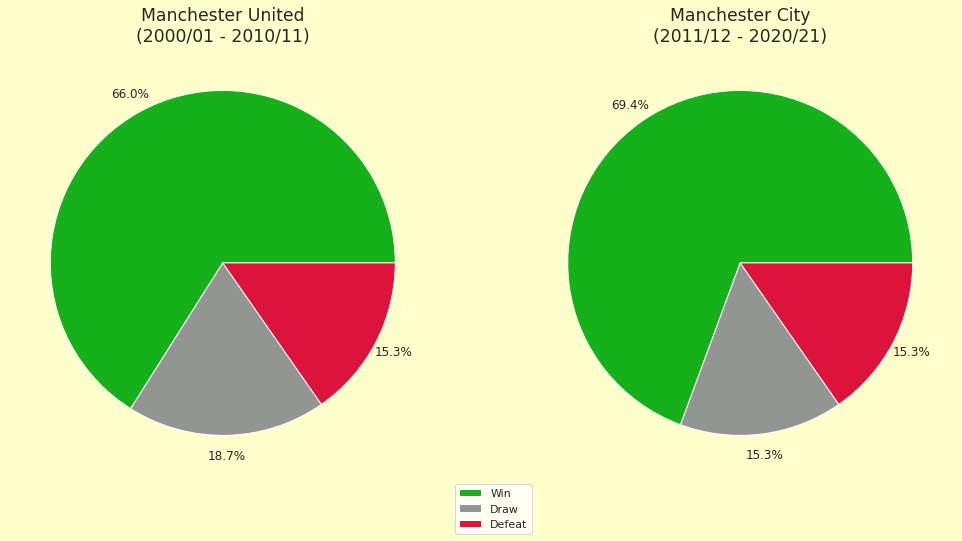

In [24]:
df_city = df_decade2[df_decade2.Team == 'Manchester City']
results_city = [df_city.Wins.sum(), df_city.Draws.sum(), df_city.Losses.sum()]
results_mun = np.array([df_mun_1.Wins.sum(), df_mun_1.Draws.sum(), df_mun_1.Losses.sum()])
#Canvas
sns.set_theme(style='white')
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(17, 8))
#Graphics
#1) Stats of United
ax1.pie(x=results_mun, autopct="%.01f%%", colors=['#15B01A', '#929591', '#DC143C'], pctdistance=1.12)
ax1.legend(bbox_to_anchor=(1.23, 0), labels=['Win', 'Draw', 'Defeat'])
ax1.set_title('Manchester United\n(2000/01 - 2010/11)', fontdict={'size': 'x-large'})
#2) Stats of City
ax2.pie(x=results_city, autopct="%.01f%%", colors=['#15B01A', '#929591', '#DC143C'], pctdistance=1.12)
ax2.set_title('Manchester City\n(2011/12 - 2020/21)', fontdict={'size': 'x-large'})
fig.set_facecolor('#FFFFCB')
fig.show()

In [25]:
df_stats = pd.DataFrame({
    'Manchester United': results_mun,
    'Manchester City': results_city
}, index=['Wins', 'Draws', 'Defeat'])
df_stats = df_stats.T
df_stats['Total points'] = [df_mun_1.Pts.sum(), df_city.Pts.sum()]
df_stats.sort_values('Total points', ascending=False, inplace=True)
df_stats

,Wins,Draws,Defeat,Total points
Manchester City,290,64,64,934
Manchester United,276,78,64,906


The statistics show that Mancheser City has been superior to Manchester United:
* The Cityzens managed to win the 69.4% of their matches and accumulate 934 points out of the 1254 possibles, i.e. 3.4% and 3% respectively more than the Red Devils.

Fun Fact: Both Teams lost the same amount of times: 64 defeats.

**STATS: TOTAL GOALS ⚽**

In [26]:
list_goals = np.array([df_mun_1['Goals Scored'].sum(), df_city['Goals Scored'].sum()])
goals_max = [df_mun_1['Goals Scored'].max(), df_city['Goals Scored'].max()]
goals_min = [df_mun_1['Goals Scored'].min(), df_city['Goals Scored'].min()]
df_goals = pd.DataFrame({
    'Total goals': list_goals,
    'Goal/Match': (list_goals / 418).round(2),
    'Max. #goals/season': goals_max, 
    'Min. #goals/season': goals_min
}, index=['Manchester United', 'Manchester City'])
df_goals.sort_values('Total goals', ascending=False, inplace=True)

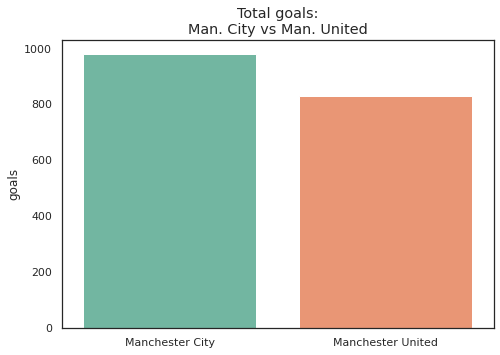

In [27]:
#Canvas
fig = plt.figure()
#Axes
ax = fig.add_axes([0, 0, 1, 1])
#Graphic
ax = sns.barplot(data=df_goals, x=df_goals.index, y='Total goals', palette='Set2')
ax.set_title('Total goals:\nMan. City vs Man. United', fontdict={'size': 'large'})
ax.set_ylabel('goals')
fig.show()

In [28]:
df_goals

,Total goals,Goal/Match,Max. #goals/season,Min. #goals/season
Manchester City,980,2.34,106,66
Manchester United,829,1.98,87,58


Manchester City have scored 151 more goals than Manchester United, thus achieving an average of 2.34 goals/match. In adittion, the Cityzens's most scoring and the least scoreing was much better than those of the Red Devils 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=25a02e7e-55cf-475b-8f35-4cb85c25603c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>